In [24]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

import pandas as pd
import os
import scipy.io
from scipy.signal import welch as pwelch

### 4.1. Creación de la señal

Text(0.5, 0, 'Tiempo (s)')

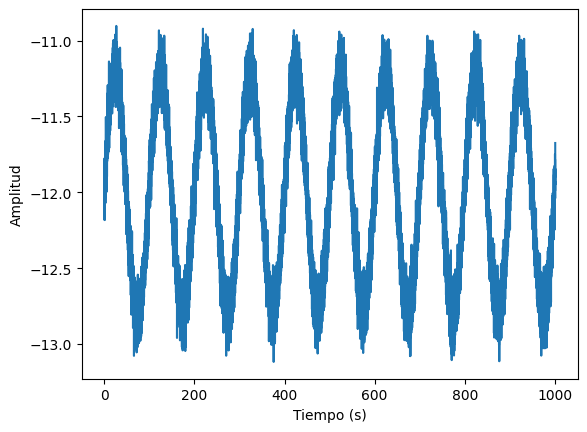

In [25]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs))-D #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

plt.plot(n,y_e)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

### 4.2. Diseño de un filtro
• Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras?s y orden 30

Text(0.5, 0, 'Tiempo (s)')

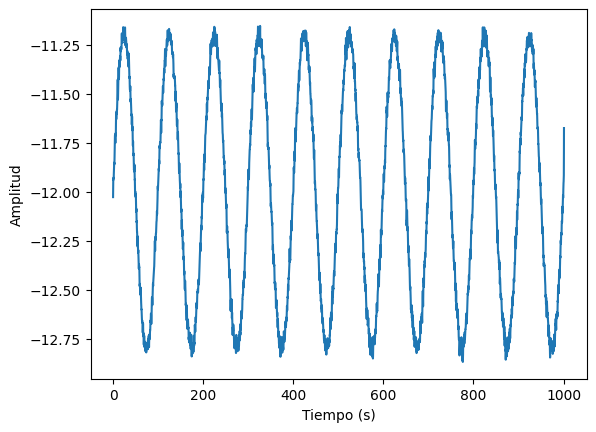

In [26]:
# PASA BAJAS
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro

plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

• ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Los argumentos que se cambian son el pass_zero , que define el tipo de filtro que se realiza y el Wn pues esta es la que se define como la frecuencia de corte de interés.

Text(0.5, 0, 'Tiempo (s)')

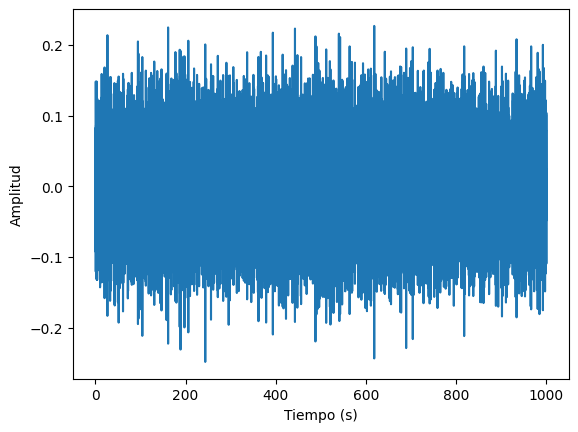

In [27]:
# PASA ALTAS
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order+1,wn, pass_zero = 'highpass',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicación del filtro

plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

En este caso, igualmente cambia el valor de pass_zero y se le entrega una lista con las frecuencias de corte.

Text(0.5, 0, 'Tiempo (s)')

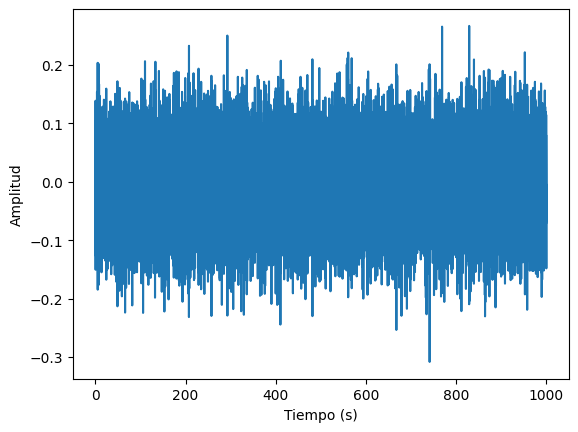

In [28]:
# PASA BANDAS
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn1,wn2 = 1.25/nyquist, 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
bandpass = signal.firwin(order+1,[wn1,wn2], pass_zero = 'bandpass',window='hamming') #filtro
y_f_band = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicación del filtro

plt.plot(n,y_f_band)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Análisis en Bode para ver las diferencias entre filtros

In [29]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

Diagrama de Bode Filtro Pasa-bajas

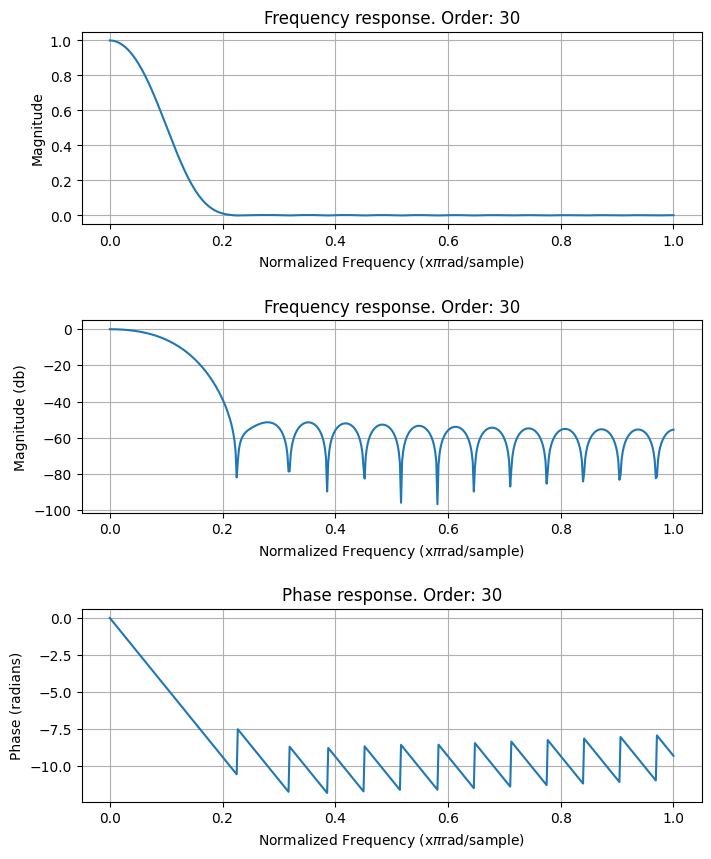

In [30]:
mfreqz(b=lowpass,a=1,order=order)

Diagrama de Bode Filtro Pasa-bandas

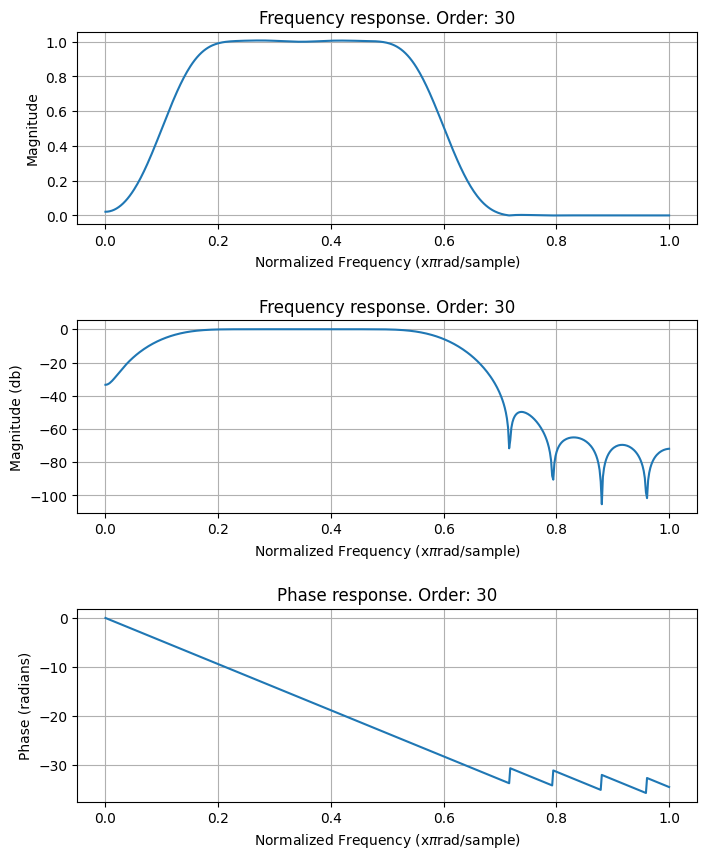

In [31]:
mfreqz(b=bandpass,a=1,order=order)

Diagrama de Bode Filtro Pasa-altas

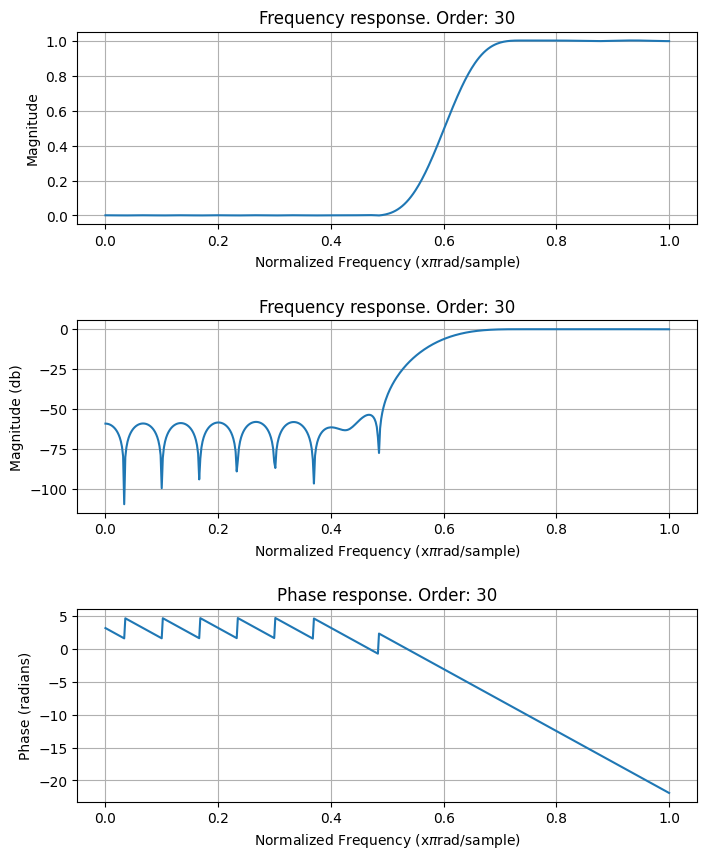

In [32]:
mfreqz(b=highpass,a=1,order=order)

• Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

Text(0.5, 0, 'Tiempo (s)')

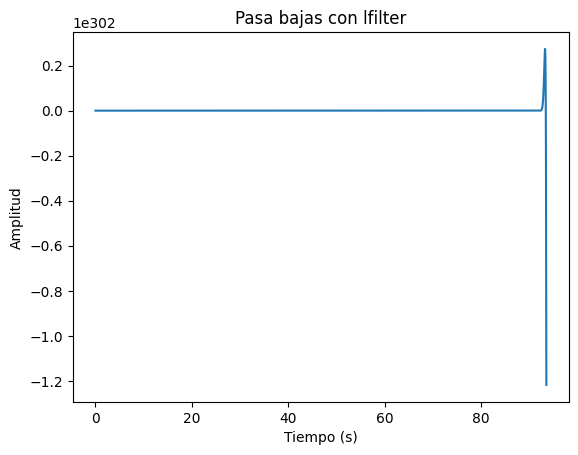

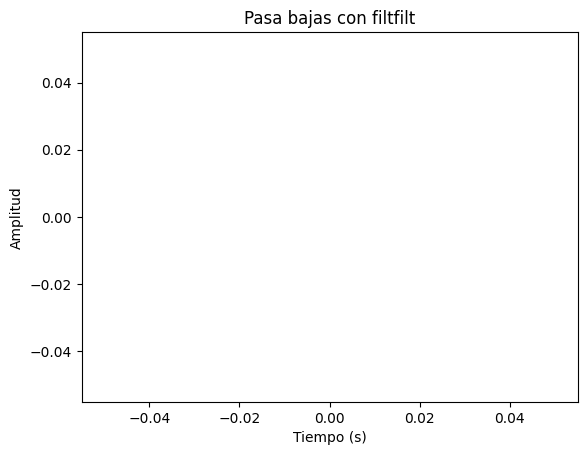

In [33]:
# PASA BAJAS
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
numerator_l, denominator_l = signal.iirfilter(order+1,wn, btype = 'lowpass',ftype='butter') #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html

y_f_30 = signal.lfilter(b=numerator_l,a=denominator_l,x=y_e) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
#Fue necesario graficar con lfilter para visualizar
plt.title("Pasa bajas con lfilter")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

y_f_30 = signal.filtfilt(b=numerator_l,a=denominator_l,x=y_e) # aplicación del filtro
plt.figure()
plt.title("Pasa bajas con filtfilt")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")


Text(0.5, 0, 'Tiempo (s)')

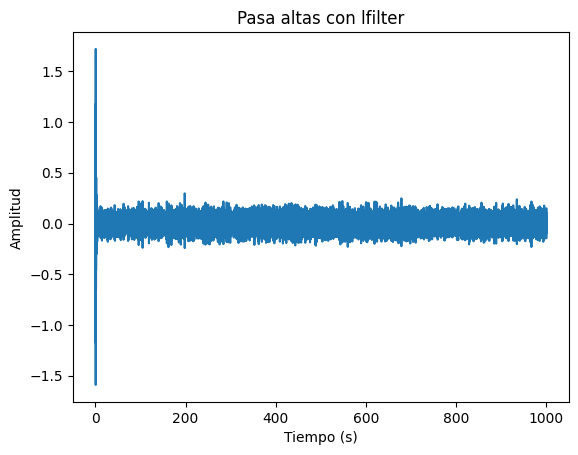

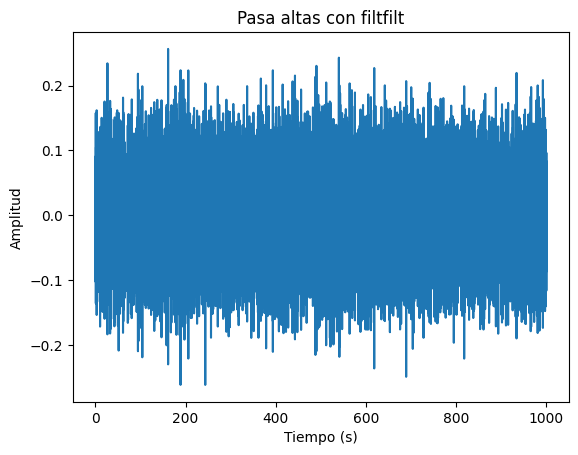

In [34]:
# PASA ALTAS
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
numerator_h, denominator_h = signal.iirfilter(order+1,wn, btype = 'highpass',ftype='butter')

y_f_30 = signal.lfilter(b=numerator_h,a=denominator_h,x=y_e) # aplicación del filtro
plt.title("Pasa altas con lfilter")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

y_f_30 = signal.filtfilt(b=numerator_h,a=denominator_h,x=y_e) # aplicación del filtro
plt.figure()
plt.title("Pasa altas con filtfilt")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Text(0.5, 0, 'Tiempo (s)')

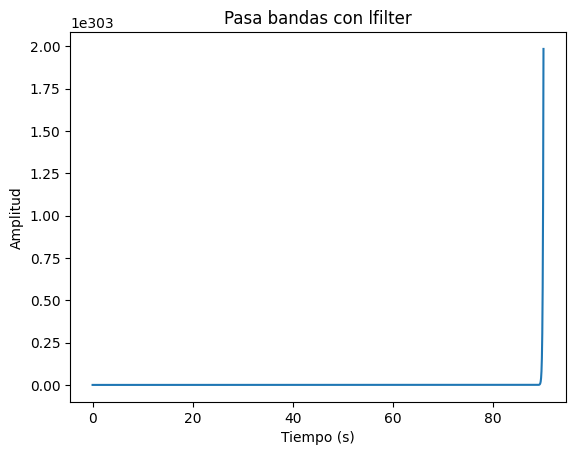

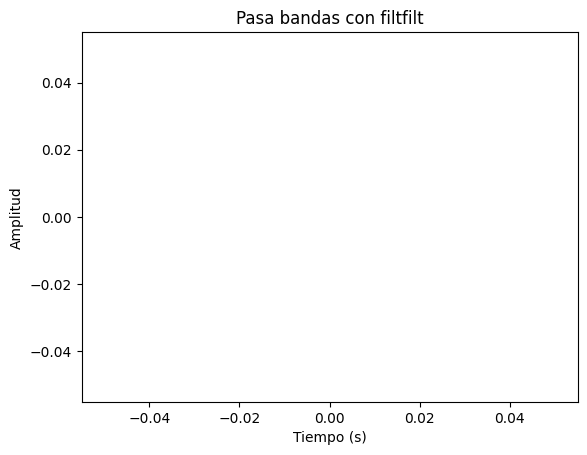

In [35]:
# PASA BANDAS
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn1,wn2 = 1.25/nyquist, 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
numerator_b, denominator_b = signal.iirfilter(order+1,[wn1,wn2], btype = 'band',ftype='butter')

y_f_30 = signal.lfilter(b=numerator_b,a=denominator_b,x=y_e) # aplicación del filtro
plt.title("Pasa bandas con lfilter")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

y_f_30 = signal.filtfilt(b=numerator_b,a=denominator_b,x=y_e) # aplicación del filtro
plt.figure()
plt.title("Pasa bandas con filtfilt")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Análisis en Bode para ver las diferencias entre filtros

Diagrama de Bode Filtro Pasa-bajas

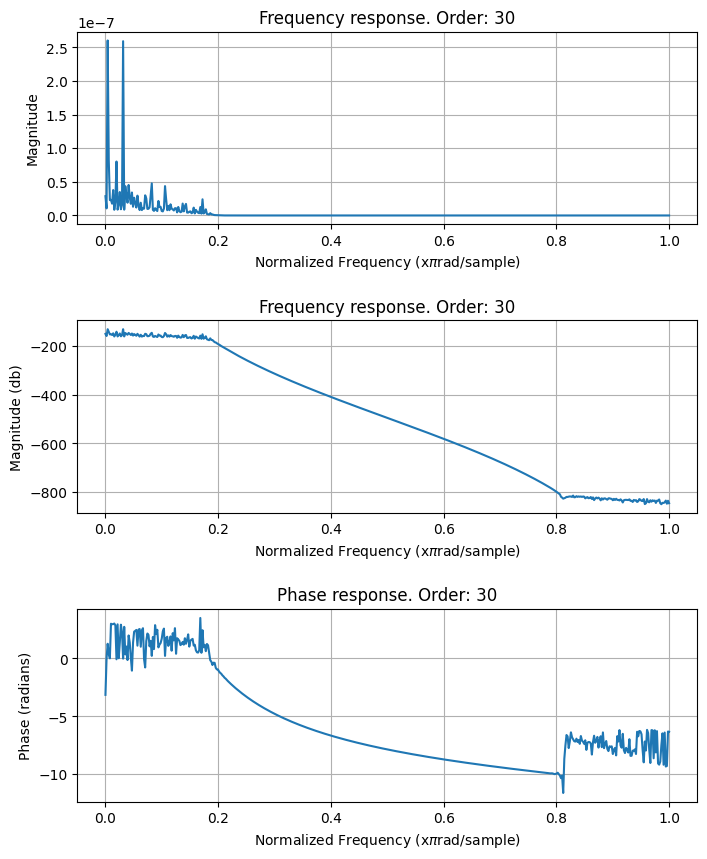

In [36]:
mfreqz(b=numerator_l,a=denominator_l,order=order)

Diagrama de Bode Filtro Pasa-altas

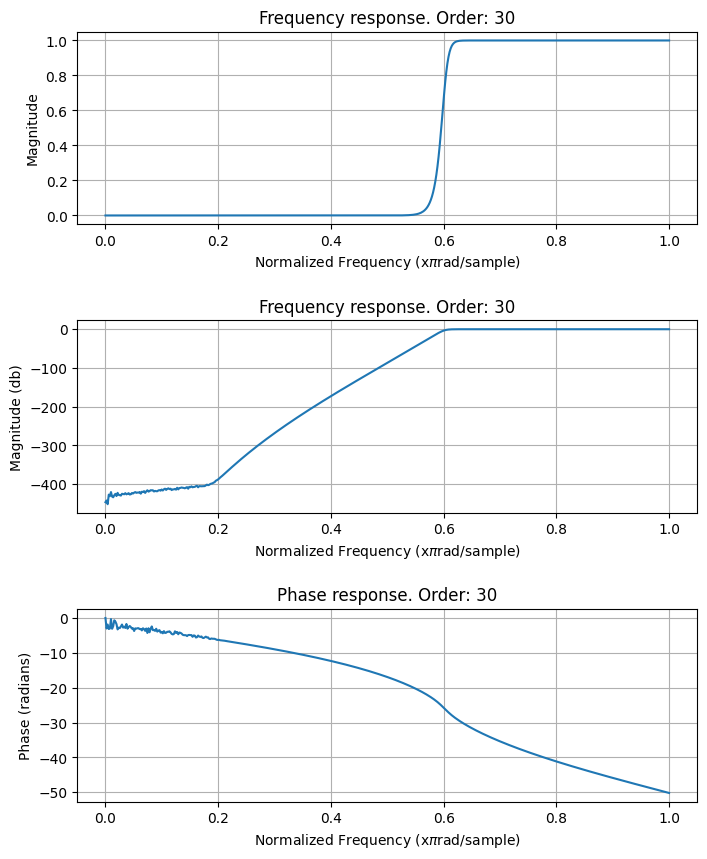

In [37]:
mfreqz(b=numerator_h,a=denominator_h,order=order)

Diagrama de Bode Filtro Pasa-bandas

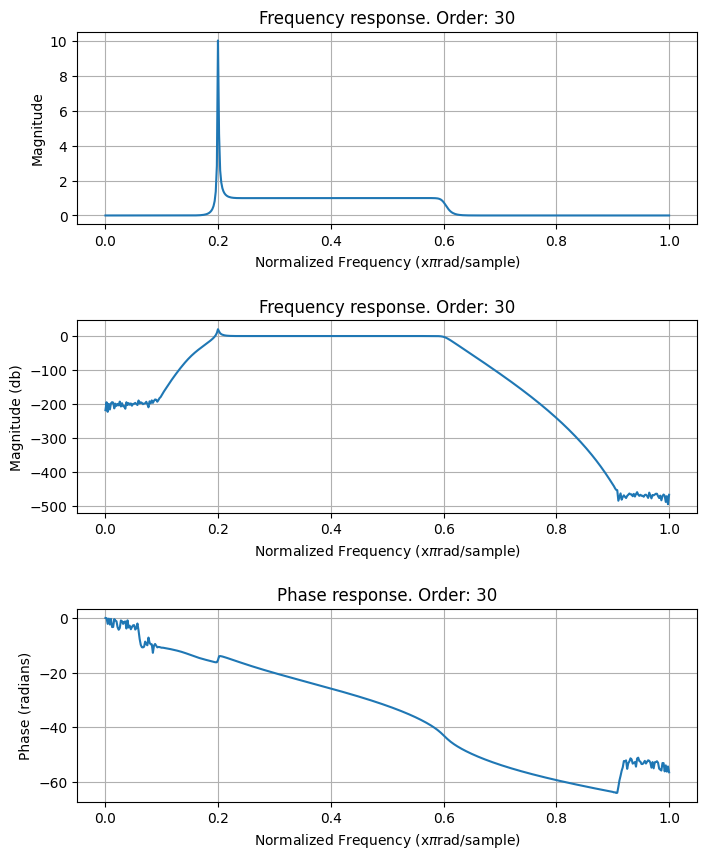

In [38]:
mfreqz(b=numerator_b,a=denominator_b,order=order)

### Análisis

Al diseñar los filtros pasa-banda y pasa-alta por medio de la función "signal.firwin()" fue necesario cambia el argumento: "pass_zero", ya  que por medio de este se especifíca el tipo de filtro que se va a realizar. En el caso del filtro pasa-banda el "pass_zero" se igualó a ‘bandpass’ y para el caso del pasa-alta se igualó a ‘highpass’. Otro argumento que fue necesario cambiar para el ejercicio fue la frecuencia de corte que se implementaba según el filtro que se deseaba diseñar.

Al diseñar lo filtros IIR con las mismas condiciones planteadas para los los FIR y graficarlos por medio de la función "signal.filtfilt", se evidenció que tanto el pasa-banda como el pasa-bajas no se podía visualizar. Por tal motivo, se procedió a graficarlos por medio de la función "signal.lfilter", con esta función se logró visualizar las señales filtradas en el tiempo pero no eran sufiente para ver el compartamiento adecuado de estos filtros, por consiguiente se decidió realizar el diagrama de Bode para todos los filtros tanto para los IIR como para los FIR para visualizarlos con respecto a la frecuencia.   

Al compara los respectivos diagramas de Bode, se observó que estos tenían un comportamiento muy diferente, especialmente en los filtros pasa-baja y pasa-banda. Estos dos filtros presentan unas perturabaciones cuando se realizaron por medio de IIR y se puede observar que tienen un mejor comportamiento al realizarlos por el método de los FIR. Por otra parte en el caso del filtro pasa-alta presenta un comportamiento muy similar tanto con FIR como con IIR, pero en este último se evidencia que presenta una pendiente más elevada.

En términos generales, los filtros FIR fueron mucho más estables y se comprueba con los diagramas de Bode, pues no presentaron tanta distorsión en fase como se da en los filtros IIR, esto debido a que los filtros IIR son recursivos, ya que utilizan valores pasados de la salida [1], por esta razón es que la fórmula tiene denominador, generando inestabilidad debido a la realimentación que se da. A partir de esto es que se da la distorsión, en especial en fase ya que los filtros IIR donde se da una fase no lineal. Dicha distorsión se da en la banda de paso y de rechazo pues se evidencia que la relación entre la frecuencia y la magnitud se dan en estas zonas.

En el dominio del tiempo se puede explicar la falta de señal en la gráfica del filtro IIR debido al orden utilizado, pues generó inestabilidad, lo que hace que la salida se desborde. Una solución es redefinir el orden del filtro cambiando la estabilidad y la ubicación de las raíces de la función de transferencia del filtro IIR.

### 4.3. Filtrado
Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR   

• Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛)  Analice

* ¿Por qué se utiliza sólo el numerador?
* ¿A qué hace referencia el numerador?
* ¿Evidencia cambios en el uso de las funciones de filtrado ?
* ¿Cómo se puede explicar la falta de coincidencia?
* ¿Es adecuado el orden del filtro usado?

Text(0.5, 0, 'Tiempo (s)')

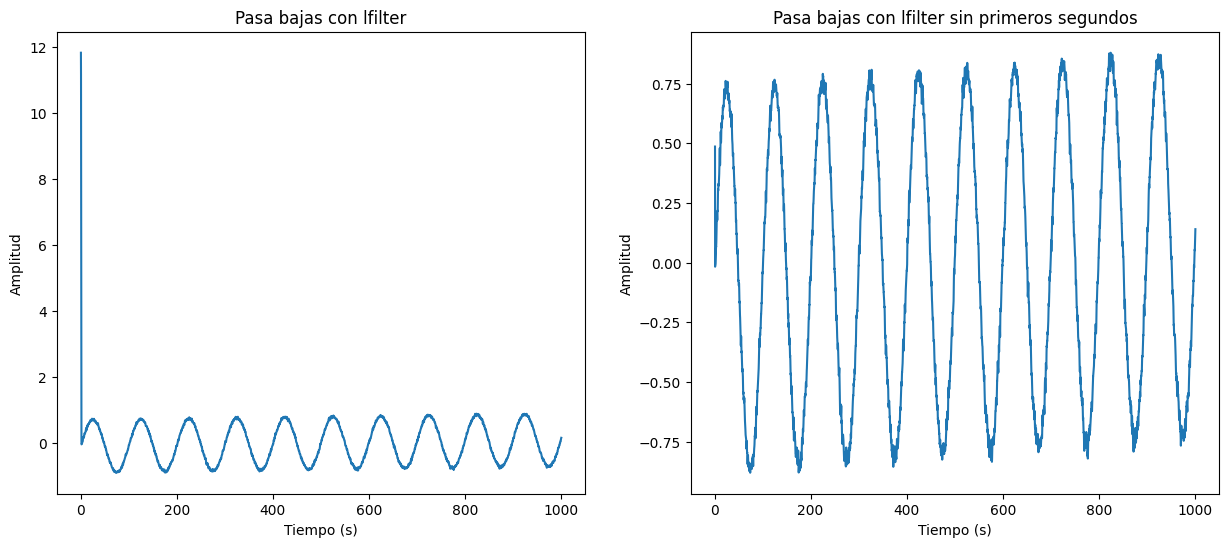

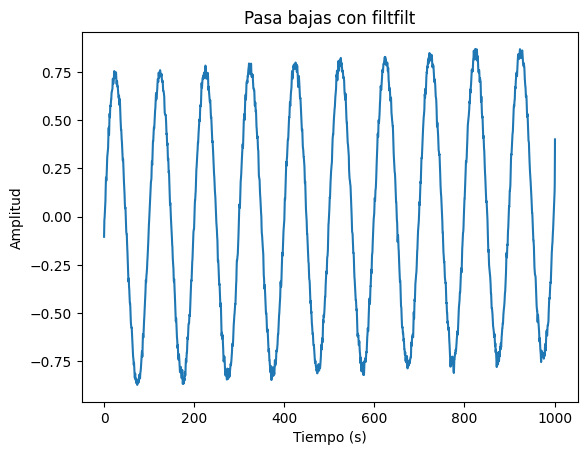

In [54]:
# PASA BAJAS (FIR)
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro

y_f_30 = signal.lfilter(b=lowpass,a=1,x=y_e) #lfilter
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title("Pasa bajas con lfilter")
plt.plot(n,signal.detrend(y_f_30))
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.subplot(1,2,2)
plt.title("Pasa bajas con lfilter sin primeros segundos")
plt.plot(n[25:],signal.detrend(y_f_30[25:]))
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # filtfilt
plt.figure()
plt.title("Pasa bajas con filtfilt")
plt.plot(n,signal.detrend(y_f_30))
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

### Análisis
El filtro FIR sólo consta de la parte no recursiva, es decir que solo utiliza muestras actuales y anteriores de la señal de entrada [1]. Por este motivo,  su fórmula evidencia que solo está conformada por el numerador, siendo los coeficientes del filtro, los cuales se utilizan para calcular la salida a partir de las muestras de entrada [2]. En términos de la función de transferencia representan los ceros del sistema, los cuales dan estabilidad pues es un punto donde la función del sistema se hace nula [3].

Al visualizar el filtro pasa-bajas por medio de las dos funciones, se evidencia un mayor cambio al inicio de la señal, ya que al usar la función "signal.lfilter" se observa un pico en el tiempo 0 con un valor de amplitud 12 pero luego está se estabiliza entre las mismas amplitudes que se visualizan desde el inicio con la función "signal.filtfilt". Esto podría indicar que la primera función se demorá más en aplicar el filtro, mientras que la segunda tiene una aplicación más inmediata.

El orden del filtro que se usa es de un valor de 30, pero si se tiene en cuenta que la Fs es de 25 al calcular el wn respecto a la frecuencia de nyquist, da un valor de 0.1 y si este valor se iguala al 3,3/m (3,3 respectivo de la ventana de Hamming) y se despeja el orden, da un valor de 33. Por lo cual se podría decir que se está haciendo uso de un valor aproximado.

• Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

Text(0.5, 0, 'Tiempo (s)')

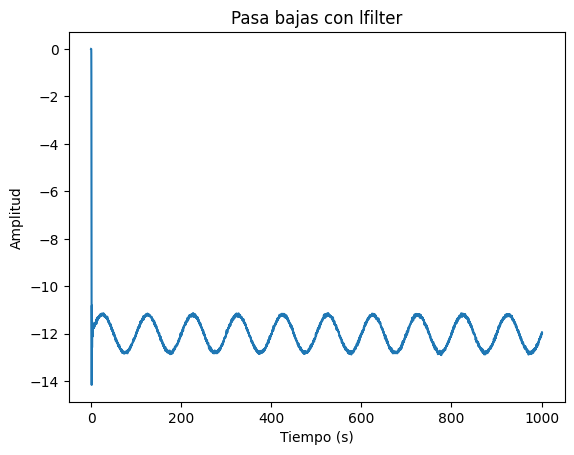

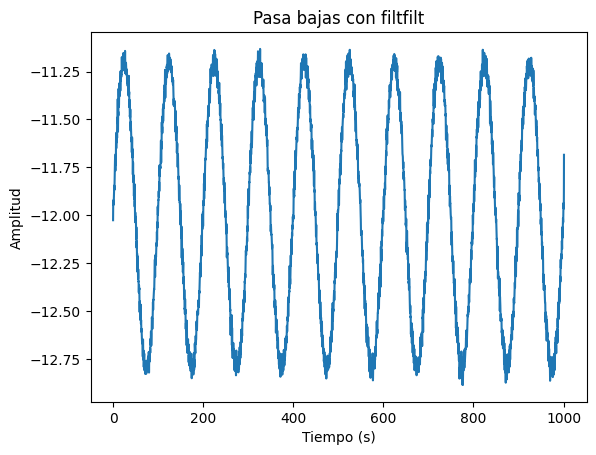

In [40]:
# PASA BAJAS (IIR)
order = 10 # Se disminuyó el orden para obtener la misma respuesta que en el filtro FIR
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
numerator_l, denominator_l = signal.iirfilter(order+1,wn, btype = 'lowpass',ftype='butter') #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html

y_f_30 = signal.lfilter(b=numerator_l,a=denominator_l,x=y_e) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
#Fue necesario graficar con lfilter para visualizar
plt.title("Pasa bajas con lfilter")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

y_f_30 = signal.filtfilt(b=numerator_l,a=denominator_l,x=y_e) # aplicación del filtro
plt.figure()
plt.title("Pasa bajas con filtfilt")
plt.plot(n,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

### Análisis

Los filtros IIR constan de una parte recursiva y otra no recursiva, por lo cual su salida es en función tanto de la entrada actual y de las precedentes como de las salidas anteriores [1],[2]. Por tal motivo para representar esto cuenta tanto con numerador (parte no recursiva), que simboliza los ceros del sistema; como con denominador (parte recursiva),figurando como los polos del sistema, haciendo que el sistema valga 0 cuando tiendan a infinito, generando inestabilidad,lo cual se pudo observar en la fórmula vista en clase.   
Asimismo, su numerador está conformado por los coeficientes respectivos para determinar la contribución de las entradas actuales y pasadas, en cambio su denominador representa la parte recursiva (retroalimentación), es decir, que está conformada por los coeficientes que determinan como estás salidas pasadas afectan la salida actual [2].

Es necesario cambiar el orden de filtro debido a que los filtros IIR requieren un menor orden para igualar en prestaciones a los FIR, por tal motivo se necesitó un filtro de orden 10. Como se puede observar en la gráfica gracias a este orden se logró el mismo comportamiento en ambos filtros.

Ambos filtros dependen de los polos y ceros que representan su sistema, es decir que la forma de las raíces del sistema describe la estabilidad y en qué puntos en específico un filtro tipo IIR puede ser estable sin desfasar la salida. Dependiendo del orden que se defina pues es parte de la ganancia que se da en el sistema.

### 4.4 Aplicación
Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.   

• Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

In [41]:
from google.colab import drive
#!pip install openpyxl
drive.mount('/content/drive') #force_remount=True
directorio_actual=os.getcwd()

senal = np.loadtxt('/content/drive/MyDrive/ColabNotebooks/Biosenales/Practica_6/senal_filtros.txt')
print(np.shape(senal))
print('datos: ', pd.DataFrame(senal))

#Canal 1 corresponde a la columna 0 de la señal
senal_canal1=senal[:,0].flatten()
senal_canal1=signal.detrend(senal_canal1)
print('Señal canal1: \n', senal_canal1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60000, 16)
datos:             0       1       2       3       4       5       6       7       8   \
0     -7.0306 -3.5899 -2.7995 -6.8884  0.9126 -6.7908  4.3411  6.5558  2.5295   
1     -7.0157 -3.5755 -2.7809 -6.8658  0.9288 -6.7672  4.3691  6.5822  2.5637   
2     -7.0426 -3.6058 -2.7972 -6.8852  0.9068 -6.7855  4.3449  6.5713  2.5465   
3     -7.0599 -3.6356 -2.8107 -6.8951  0.8900 -6.8084  4.3239  6.5683  2.5225   
4     -7.0538 -3.6399 -2.7953 -6.8751  0.9060 -6.7994  4.3398  6.5981  2.5667   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995 -7.5477 -3.7738 -3.0120 -6.9647  0.9116 -6.7962  4.3393  6.5189  2.5074   
59996 -7.5477 -3.7693 -3.0032 -6.9557  0.9126 -6.7922  4.3603  6.5391  2.5451   
59997 -7.5644 -3.7805 -3.0125 -6.9695  0.8959 -6.7994  4.3417  6.5367  2.5087   
59998 -7.5477 -3.7574 -2.9894 -6.9551  0.

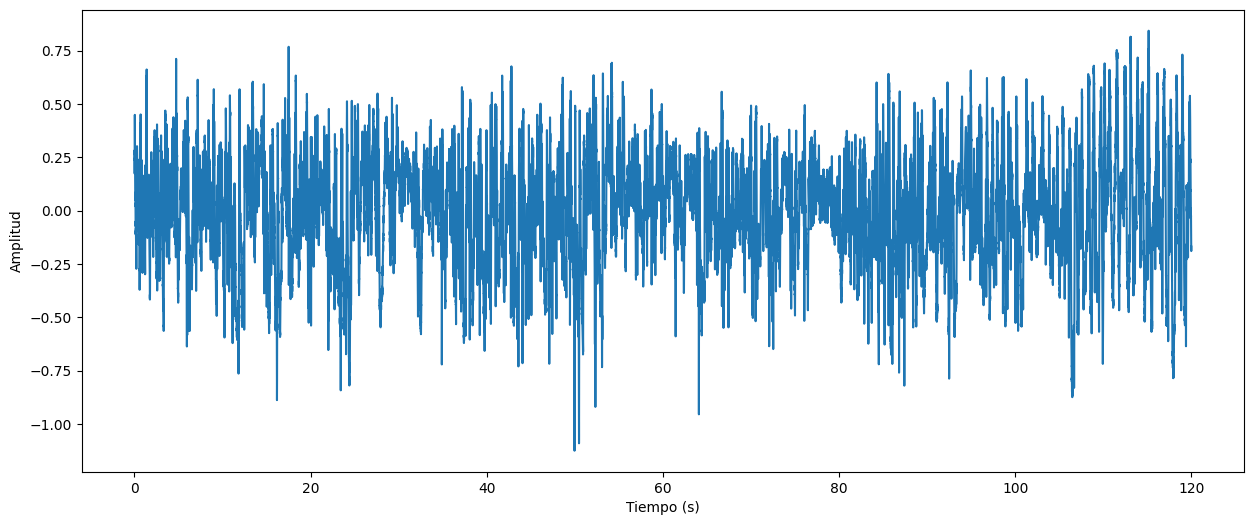

In [55]:
Fs = 500 # Frecuencia de muestreo
Ts = 1/Fs # Periodo de muestreo

def tiempo(fs,archivo):
    paso = 1/fs
    fin = len(archivo)
    dato=paso*fin
    tiempo = np.arange(0,dato,paso)
    return tiempo

t = tiempo(Fs,senal_canal1)

plt.figure(figsize=(15, 6))
plt.plot(t, senal_canal1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

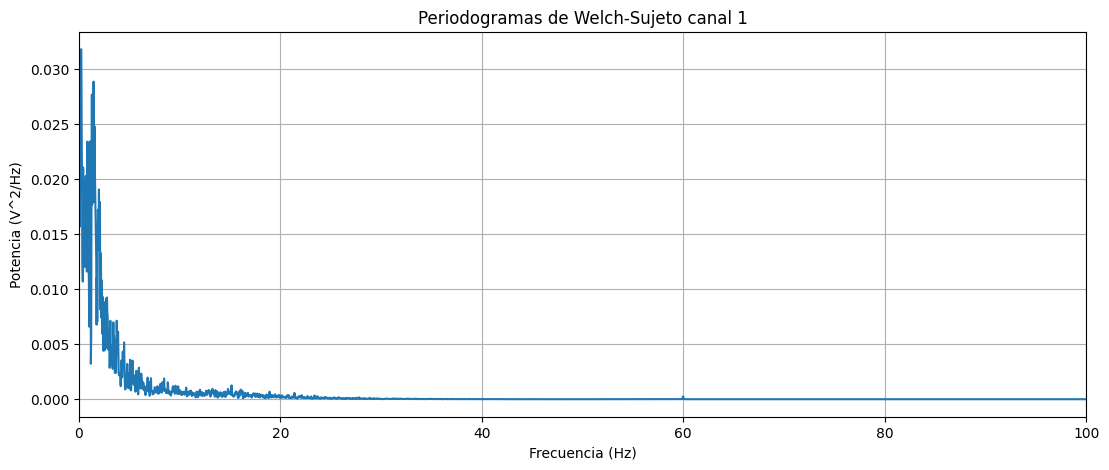

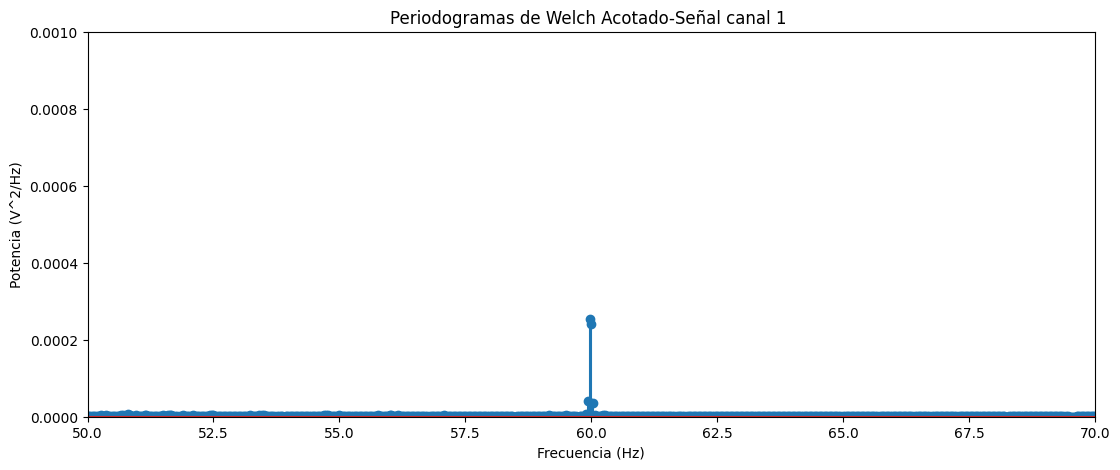

In [43]:
nperseg=60000/4 #Ancho de la ventana (fracción de la longitud total del canal)
noverlap = int(nperseg/2) #Solapamiento

f,Pxx = pwelch(senal_canal1,Fs,'hann',nperseg,noverlap)

plt.figure(figsize=(13, 5))
plt.plot(f,Pxx)
#plt.subplot(2,2,1)
plt.title('Periodogramas de Welch-Sujeto canal 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([0,100])
plt.grid(True)


plt.figure(figsize=(13, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([50, 70])  # rango para el eje X
plt.ylim([0, 0.001])  # rango para el eje y
plt.title("Periodogramas de Welch Acotado-Señal canal 1 ")
plt.show()

• Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

Text(0.5, 0, 'Tiempo (s)')

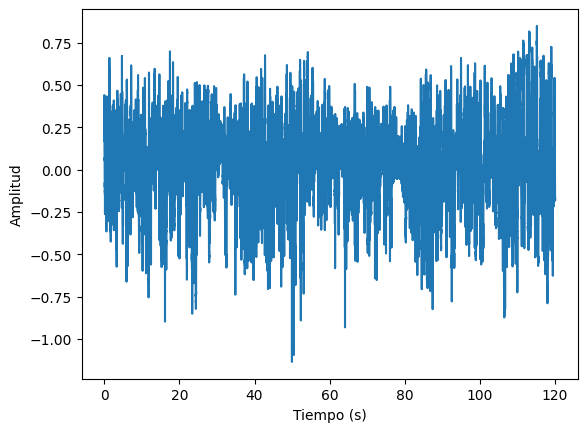

In [44]:
# FILTRO NOTCH
order = 34 # Se calculó el orden con la tabla 1 brindada en clase y con las características de una ventana hamming
nyquist = Fs/2 # frecuencia de nyquist
wn1,wn2 = 50/nyquist, 70/nyquist #frecuencia de corte normalizada respecto nyquist
bandstop = signal.firwin(order+1,[wn1,wn2], pass_zero = 'bandstop',window='hamming') #filtro
y_f_30 = signal.filtfilt(b=bandstop,a=1,x=senal_canal1) # aplicación del filtro

plt.plot(t,y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

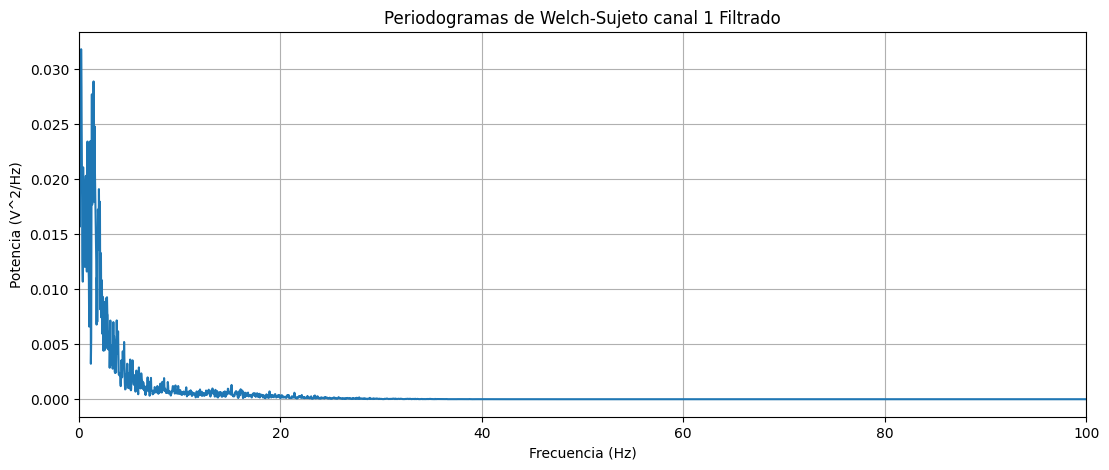

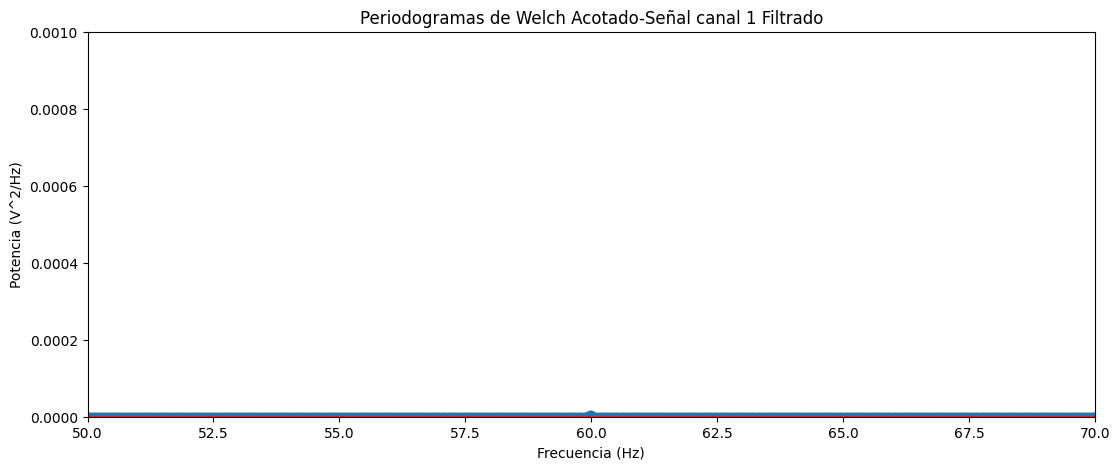

In [45]:
nperseg=60000/4 #Ancho de la ventana (fracción de la longitud total del canal)
noverlap = int(nperseg/2) #Solapamiento

f,Pxx = pwelch(y_f_30,Fs,'hann',nperseg,noverlap)

plt.figure(figsize=(13, 5))
plt.plot(f,Pxx)
#plt.subplot(2,2,1)
plt.title('Periodogramas de Welch-Sujeto canal 1 Filtrado')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([0,100])
plt.grid(True)


plt.figure(figsize=(13, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (V^2/Hz)')
plt.xlim([50, 70])  # rango para el eje X
plt.ylim([0, 0.001])  # rango para el eje y
plt.title("Periodogramas de Welch Acotado-Señal canal 1 Filtrado")
plt.show()

• Grafique un segmento de las señales antes y después de filtrar, analice los cambios.

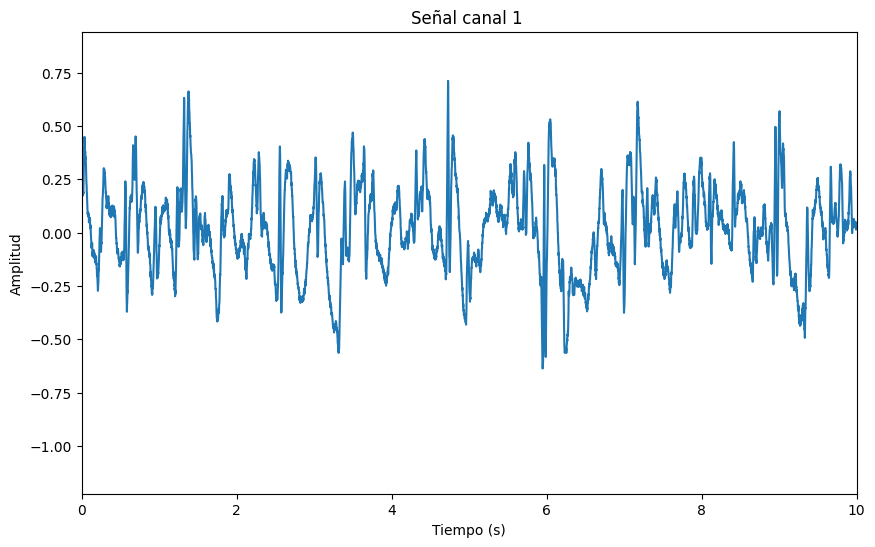

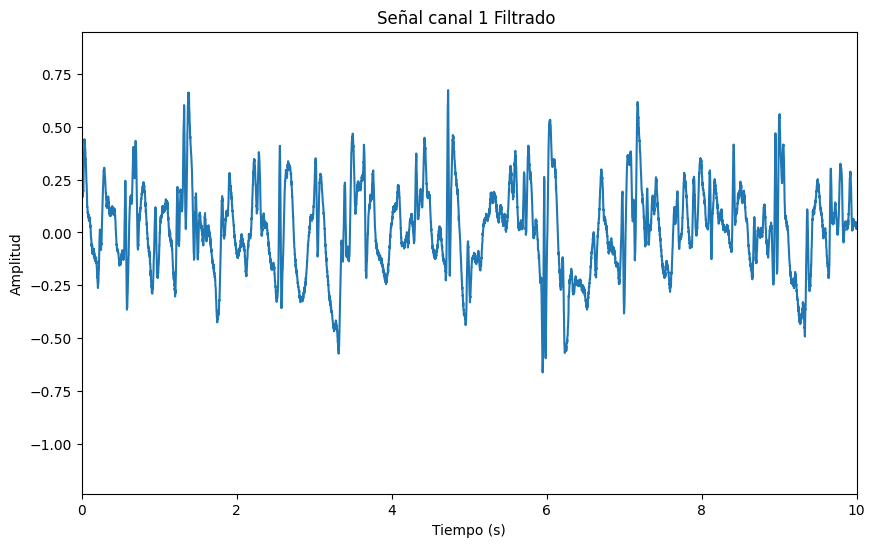

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(t, senal_canal1)
plt.title("Señal canal 1 ")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0, 10])  # rango para el eje X
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y_f_30)
plt.title("Señal canal 1 Filtrado ")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0, 10])  # rango para el eje X
plt.show()

#### Análisis

En la señal entregada había presencia de ruido eléctrico, sin embargo este no era significativo respecto a la amplitud de la señal, evidenciándose en el periodograma de la señal, pues las potencias máximas se encuentran en frecuencias menores a 10Hz y antes de 20Hz aún se denotan potencias haciendo inspección visual; mientras que el ruido eléctrico se presenta a 60 Hz, por tal motivo es que se acortó la señal para inspeccionar esa zona de mejor manera, encontrando un pico de 0.0002 de potencia aproximadamente el cual se retiró aplicando un filtro a esa frecuencia.

No se aplicó ningún otro filtro teniendo en cuenta que no se conoce el origen de la señal, por lo que no se tiene caracterizada la información de interés.

Por otro lado, se evidencia que el ruido eléctrico, al tener poca potencia en comparación con el resto de la señal, no genera un cambio evidente o singificativo sobre la señal pues la graficación de antes y después de aplicado el filtro es similar en gran medida. y la representación en frecuencia solo se denota el cambio de la desaparición del pico en la frecuencia de la red eléctrica.

### Conclusiones
* Es de gran importancia definir los parámetros de diseño del filtro como el orden correcto, ya que dependiendo de la señal,se ve afectada por la presencia de fase no lineal y qué tanto afecta a la señal. Otro parámetro es la caracterización de la señal para poder definir qué es ruido y qué frecuencias de corte utilizar según el filtro lineal a aplicar.

* Los filtros IIR pueden representar filtros FIR utilizando un orden menor y filtrar información con baja potencia no es representativo en la señal filtrada.

### Referencias

[1] Pablo Cetta. Accedido el 31 de octubre de 2024. [En línea]. Disponible: https://www.pablocetta.com/pdfs/publicaciones/filtros.pdf

[2] Test Page for the HTTP Server on Red Hat Enterprise Linux. Accedido el 31 de octubre de 2024. [En línea]. Disponible: https://biblus.us.es/bibing/proyectos/abreproy/11375/fichero/MEMORIA%2FFundamentos+teoricos.pdf

[3] J. A. R. Galván, “Función transferencia y estabilidad en sistemas”, mar. 2014, [En línea]. Disponible en: http://lcr.uns.edu.ar/fvc/NotasDeAplicacion/FVC-JuanAlbertoRegaladoGalvan.pdf
